In [7]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
data=pd.read_csv("train_BRCpofr.csv")

In [9]:
data

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736
...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736
89388,89389,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum,67596
89389,89390,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum,114120
89390,89391,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum,71772


In [10]:
data.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

### Exploratory data analysis

C:\Users\preth\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cltv', ylabel='Density'>

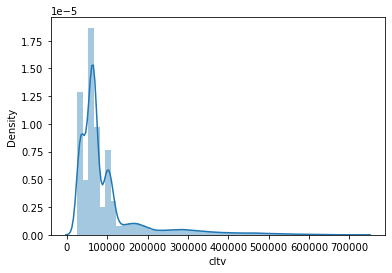

In [11]:
#univariate analysis
sns.distplot(data["cltv"])

C:\Users\preth\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='claim_amount', ylabel='Density'>

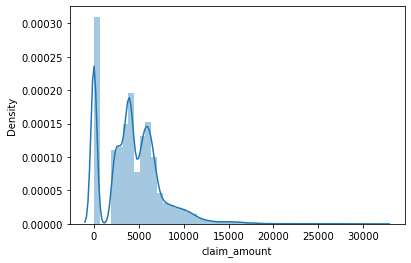

In [12]:
sns.distplot(data["claim_amount"])

C:\Users\preth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

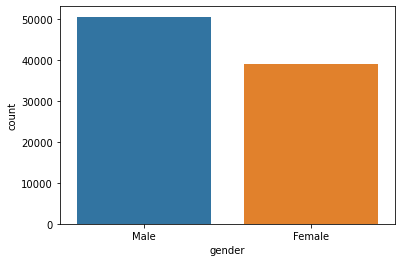

In [13]:
sns.countplot(data["gender"])

C:\Users\preth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area', ylabel='count'>

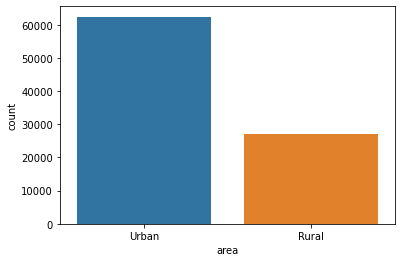

In [14]:
sns.countplot(data["area"])

C:\Users\preth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='qualification', ylabel='count'>

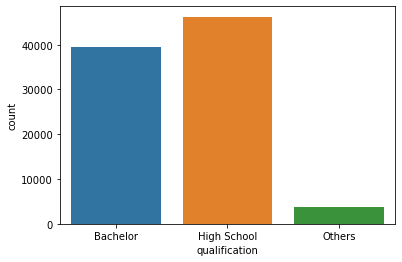

In [15]:
sns.countplot(data["qualification"])

C:\Users\preth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='policy', ylabel='count'>

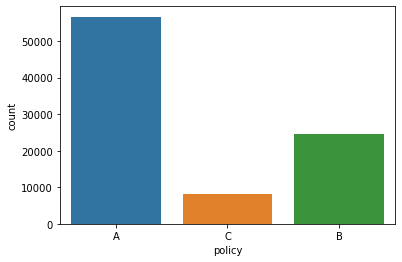

In [16]:
sns.countplot(data["policy"])

C:\Users\preth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_policies', ylabel='count'>

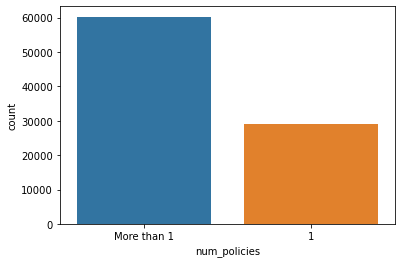

In [17]:
sns.countplot(data["num_policies"])

C:\Users\preth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type_of_policy', ylabel='count'>

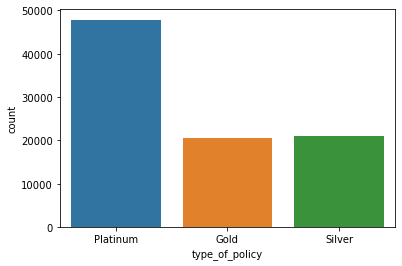

In [18]:
sns.countplot(data["type_of_policy"])

C:\Users\preth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='count'>

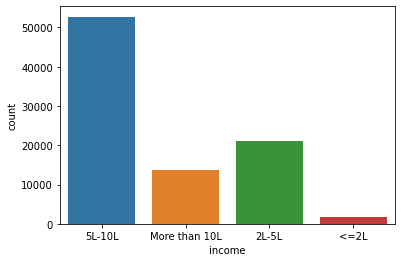

In [19]:
sns.countplot(data["income"])

C:\Users\preth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vintage', ylabel='count'>

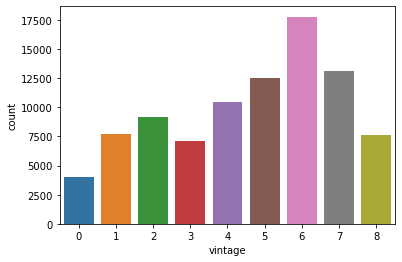

In [20]:
sns.countplot(data["vintage"])

In [21]:
#creating a function to perform anova test
def anova_test(x,y):
    import statsmodels.api as sm
    from statsmodels.formula.api import ols
    formula='{0} ~ {1}'.format(x,y)
    model=ols(formula,data=data).fit()
    anova_result=sm.stats.anova_lm(model,typ=2)
    anova_result.dropna(inplace=True,axis=0)
    for i in anova_result["PR(>F)"]:
        if i<0.05:
            print([x[5:-1],y[5:-1]]," "*4,"Relationship exits")
        else:
            print([x[5:-1],y[5:-1]]," "*4,"No relationship")

C:\Users\preth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='claim_amount', ylabel='cltv'>

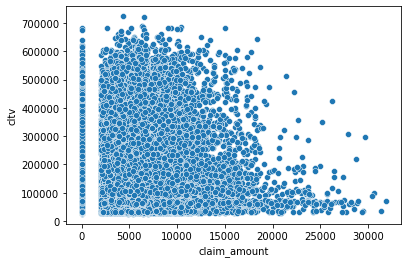

In [22]:
#Bi-variate analysis
sns.scatterplot(data["claim_amount"],data["cltv"])

<AxesSubplot:xlabel='gender'>

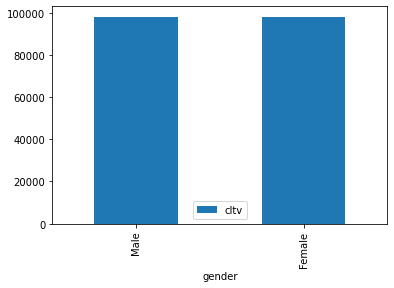

In [23]:
colunas = data.columns[1:-1]
data[[colunas[0],"cltv"]].groupby(colunas[0]).mean().sort_values(by="cltv").plot(kind="bar")

<AxesSubplot:xlabel='area'>

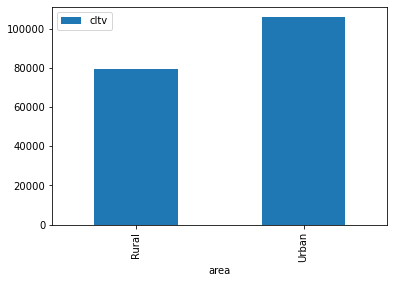

In [24]:
data[[colunas[1],"cltv"]].groupby(colunas[1]).mean().sort_values(by="cltv").plot(kind="bar")

<AxesSubplot:xlabel='qualification'>

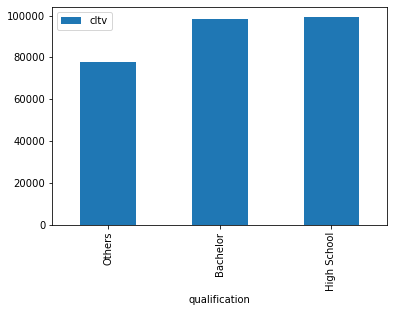

In [25]:
data[[colunas[2],"cltv"]].groupby(colunas[2]).mean().sort_values(by="cltv").plot(kind="bar")

<AxesSubplot:xlabel='income'>

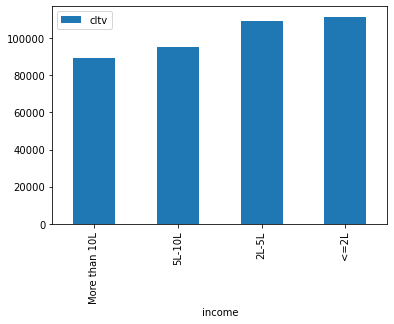

In [26]:
data[[colunas[3],"cltv"]].groupby(colunas[3]).mean().sort_values(by="cltv").plot(kind="bar")

<AxesSubplot:xlabel='marital_status'>

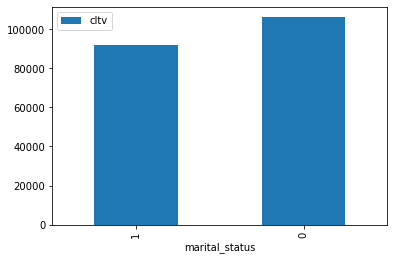

In [27]:
data[[colunas[4],"cltv"]].groupby(colunas[4]).mean().sort_values(by="cltv").plot(kind="bar")

<AxesSubplot:xlabel='vintage'>

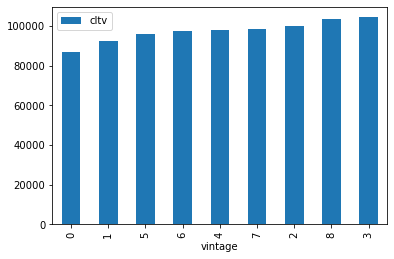

In [28]:
data[[colunas[5],"cltv"]].groupby(colunas[5]).mean().sort_values(by="cltv").plot(kind="bar")

<AxesSubplot:xlabel='num_policies'>

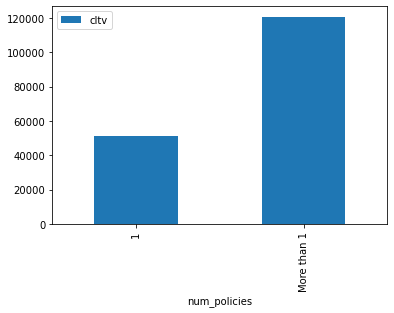

In [29]:
data[[colunas[7],"cltv"]].groupby(colunas[7]).mean().sort_values(by="cltv").plot(kind="bar")

<AxesSubplot:xlabel='policy'>

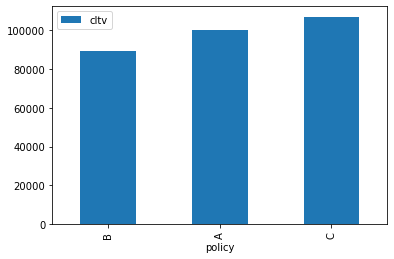

In [30]:
data[[colunas[8],"cltv"]].groupby(colunas[8]).mean().sort_values(by="cltv").plot(kind="bar")

<AxesSubplot:xlabel='type_of_policy'>

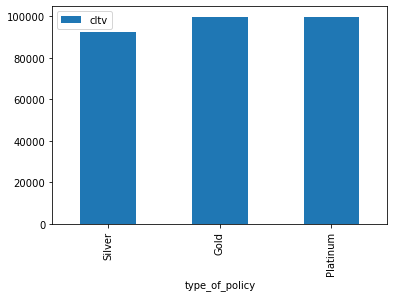

In [31]:
data[[colunas[9],"cltv"]].groupby(colunas[9]).mean().sort_values(by="cltv").plot(kind="bar")

### Encoding

In [33]:
data["area"]=data["area"].replace({"Rural":2,"Urban":1})
data["qualification"]=data["qualification"].replace({"Bachelor":1,"High School":2,"Others":3})
data["gender"]=data["gender"].replace({"Male":1,"Female":0})
data["income"]=data["income"].replace({"More than 10L":1,"5L-10L":2,"2L-5L":3,"<=2L":4})
data["num_policies"]=data["num_policies"].replace({"More than 1":1,"1":2})
data["type_of_policy"]=data["type_of_policy"].replace({"Platinum":1,"Gold":2,"Silver":3})
data["policy"]=data["policy"].replace({"A":1,"B":2,"C":3})

In [34]:
data["type_of_policy"].value_counts()

1    47796
3    21010
2    20586
Name: type_of_policy, dtype: int64

In [35]:
data

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,1,1,1,2,1,5,5790,1,1,1,64308
1,2,1,2,2,2,0,8,5080,1,1,1,515400
2,3,1,1,1,2,1,8,2599,1,1,1,64212
3,4,0,2,2,2,0,7,0,1,1,1,97920
4,5,1,1,2,1,1,6,3508,1,1,2,59736
...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,1,2,2,1,0,6,0,1,2,1,95736
89388,89389,1,1,1,2,1,0,3897,1,1,1,67596
89389,89390,0,1,1,2,0,4,3363,1,2,1,114120
89390,89391,0,2,2,3,0,8,0,1,2,1,71772


In [36]:
anova_test('data["gender"]','data["cltv"]')

['"gender"', '"cltv"']      No relationship


In [37]:
k=["num_policies","type_of_policy","policy"]
for i in data.columns[1:7]:
    k.append(i)
for i in k:
    k='data["{0}"]'.format(i)
    anova_test(k,'data["cltv"]')

['"num_policies"', '"cltv"']      Relationship exits
['"type_of_policy"', '"cltv"']      Relationship exits
['"policy"', '"cltv"']      Relationship exits
['"gender"', '"cltv"']      No relationship
['"area"', '"cltv"']      Relationship exits
['"qualification"', '"cltv"']      Relationship exits
['"income"', '"cltv"']      Relationship exits
['"marital_status"', '"cltv"']      Relationship exits
['"vintage"', '"cltv"']      Relationship exits


In [38]:
data.drop(["id","gender"],axis=1,inplace=True)

<AxesSubplot:>

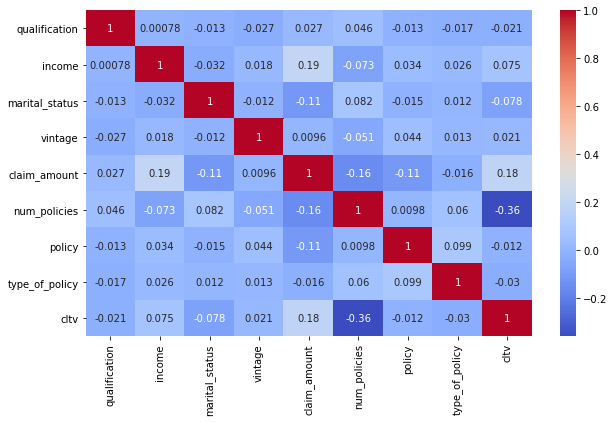

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")

In [40]:
data.drop("claim_amount",axis=1,inplace=True)

### Model building 

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

In [42]:
x=data.drop("cltv",axis=1)
y=data["cltv"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
def trained_model(x):
    lr=x
    lr.fit(x_train,y_train)
    print(str(x)[:-2])
    print("R2 score : ",lr.score(x_test,y_test))
    print("Cross_val_score :",np.mean(cross_val_score(lr,x_train,y_train)))

In [44]:
trained_model(LinearRegression())

LinearRegression
R2 score :  0.13656156802515174
Cross_val_score : 0.13389477873693947


In [45]:
trained_model(DecisionTreeRegressor())

DecisionTreeRegressor
R2 score :  0.10018259474605973
Cross_val_score : 0.10056645415377012


In [46]:
trained_model(XGBRegressor())

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=Non
R2 score :  0.1272460518158025
Cross_val_score : 0.12975627758794836


In [47]:
from sklearn.model_selection import RandomizedSearchCV

In [48]:
xgb=XGBRegressor() 

In [49]:
#Hyperparameter tuning
max_depth = [int(x) for x in np.linspace(start = 5, stop = 20, num = 15)]
learning_rate = ['0.01', '0.05', '0.1', '0.25', '0.5', '0.75', '1.0']
min_child_weight = [int(x) for x in np.linspace(start = 45, stop = 70, num = 15)]

In [50]:
params = {
 "learning_rate"    : learning_rate,
 "max_depth"        : max_depth,
 "min_child_weight" : min_child_weight,
 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]
}

In [51]:
xgb_cv = RandomizedSearchCV(xgb, param_distributions = params, cv = 5, random_state = 42)

In [52]:
xgb_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validate

In [53]:
xgb_cv.best_params_

{'min_child_weight': 61,
 'max_depth': 7,
 'learning_rate': '0.5',
 'gamma': 0.2,
 'colsample_bytree': 0.4}

In [54]:
xgb=XGBRegressor(min_child_weight=53,max_depth=17,learning_rate=0.25,gamma=0.0,colsample_bytree=0.3)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0.0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.25, max_delta_step=0,
             max_depth=17, min_child_weight=53, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [55]:
print("R2 score : ",xgb.score(x_test,y_test))
print("Cross_val_score :",np.mean(cross_val_score(xgb,x_train,y_train)))

R2 score :  0.14161163414896494
Cross_val_score : 0.14224965540758694
